In [32]:
# third party library imports
import pandas as pd
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sb

In [33]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,average_salary,same_state,age,python,r,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,NM,"Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,0,48,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,MD,"Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,0,37,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,FL,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,1,11,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,WA,"Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,1,56,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,NY,"New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,1,23,1,0,0,0,1


In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'same_state', 'age', 'python', 'r', 'spark', 'aws',
       'excel'],
      dtype='object')

In [35]:
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
# hourly wage to annual

# remove new line from job title

In [36]:
# set the seniority column
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [37]:
# fix job title and seniority
df['Job Title'] = df['Job Title'].apply(simplify_title)
df['Job Title'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: Job Title, dtype: int64

In [38]:
# fix state Los Angeles
#df[df['Location'] == ' Los Angeles'] = 'LA'
df['Location'] = df['Location'].apply(lambda x : x.strip())
df['Location'] = df['Location'].apply(lambda x : 'LA' if x.lower() =='los angeles' else x)
df['Location'].value_counts()

CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
MO      9
AZ      9
AL      8
GA      6
KY      6
MI      6
DE      6
CT      5
LA      5
IA      5
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: Location, dtype: int64

In [39]:
# job description length
df['desc_length'] = df['Job Description'].apply(lambda x : len(x))
df['desc_length']
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
average_salary       float64
same_state             int64
age                    int64
python                 int64
r                      int64
spark                  int64
aws                    int64
excel                  int64
seniority             object
desc_length            int64
dtype: object

In [40]:
# competitor count
df['#competitors'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['#competitors']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [41]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'],axis=1)
df['min_salary']

0       53
1       63
2       80
3       56
4       86
5       71
6       54
7       86
8       38
9      120
10     126
11      64
12     106
13      46
14      83
15     102
16      67
17     118
18     110
19      64
20      81
21      73
22      86
23      63
24     109
25      63
26      75
27      34
28      63
29      80
30      56
31      72
32      86
33      93
34      85
35      77
36      82
37      83
38     115
39      74
40      64
41      68
42     110
43      52
44     110
45     150
46     158
47      20
48      56
49      63
50      68
51      86
52      41
53      86
54      80
55      56
56     120
57     111
58      54
59      71
60      82
61      84
62     107
63      49
64      61
65      88
66      60
67      41
68      96
69      65
70      52
71     139
72      50
73      85
74      74
75      99
76      79
77      57
78      83
79      86
80      94
81      37
82     100
83      55
84      60
85      39
86     106
87      86
88      64
89      31
90      34

In [42]:
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'],axis=1)
df['max_salary']

0       91
1      112
2       90
3       97
4      143
5      119
6       93
7      142
8       84
9      160
10     201
11     106
12     172
13      85
14     144
15     190
16     137
17     189
18     175
19     111
20     130
21     119
22     139
23     105
24     177
25     110
26     124
27      61
28     105
29      90
30      97
31     120
32     143
33     149
34     140
35     135
36     132
37     137
38     180
39     138
40     112
41     129
42     175
43     113
44     150
45     160
46     211
47      39
48     117
49      99
50     114
51     143
52      95
53     144
54     139
55      95
56     189
57     176
58      93
59     119
60     132
61     146
62     172
63      85
64     109
65     148
66      99
67      72
68     161
69     130
70      81
71     220
72     102
73     139
74     122
75     157
76     222
77     118
78     137
79     141
80     154
81      76
82     160
83     100
84     114
85      68
86     172
87     142
88     107
89      65
90      62

In [43]:
df['Company Name'] = df['Company Name'].apply(lambda x:x.strip())
df['Company Name']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [44]:
# get stats for all the features of the data frame
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python,r,spark,aws,excel,desc_length,#competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


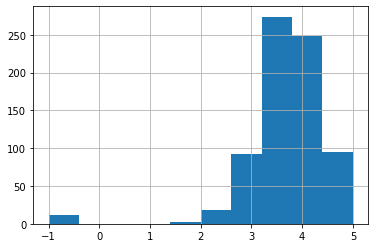

In [45]:
df['Rating'].hist()

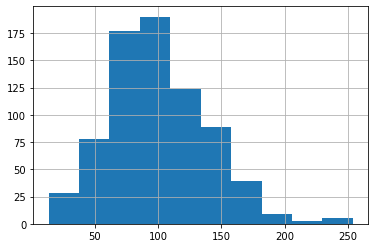

In [46]:
df['average_salary'].hist()

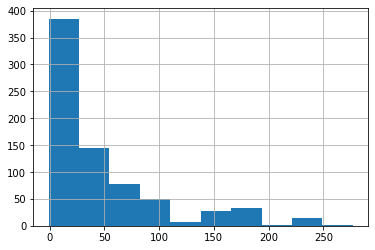

In [47]:
df['age'].hist()

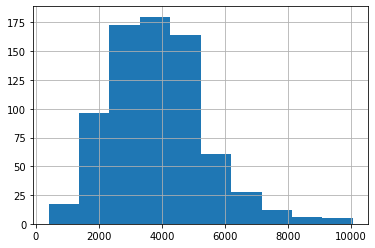

In [48]:
df['desc_length'].hist()

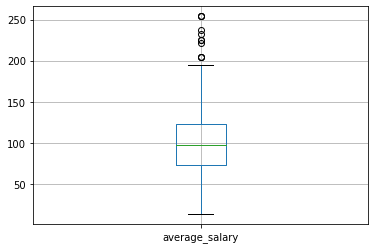

In [49]:
df.boxplot(column='average_salary')

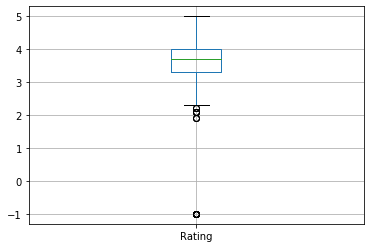

In [50]:
df.boxplot(column='Rating')

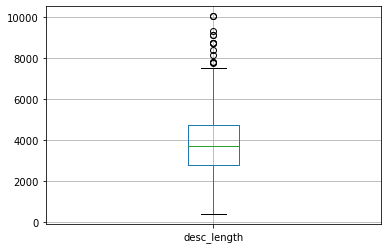

In [51]:
df.boxplot(column='desc_length')

In [52]:
df[['age','average_salary','Rating','desc_length','#competitors']].corr()

,age,average_salary,Rating,desc_length,#competitors
age,1.000000,0.019574,0.023162,0.164188,0.127482
average_salary,0.019574,1.000000,0.013492,0.078808,0.093813
Rating,0.023162,0.013492,1.000000,-0.012281,0.027190
desc_length,0.164188,0.078808,-0.012281,1.000000,0.104620
#competitors,0.127482,0.093813,0.027190,0.104620,1.000000


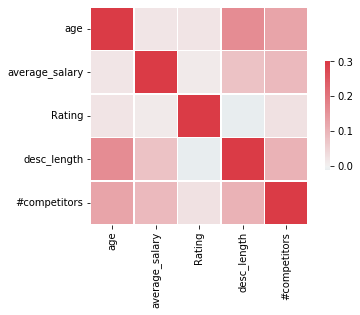

In [53]:
# hearmap for correlation
cmap = sb.diverging_palette(220,10,as_cmap=True)
sb.heatmap(df[['age','average_salary','Rating','desc_length','#competitors']].corr(),vmax=0.3,center=0,cmap=cmap,square=True,
           linewidths=0.5,cbar_kws={'shrink':0.5})

In [54]:
# for categorical vars
df_cat = df[['Company Name','Location','Headquarters','Size','Type of ownership', 'Industry', 'Sector','Revenue','same_state','python', 'r', 'spark', 'aws',
       'excel', 'seniority']]

graph for Company Name : total = 343 


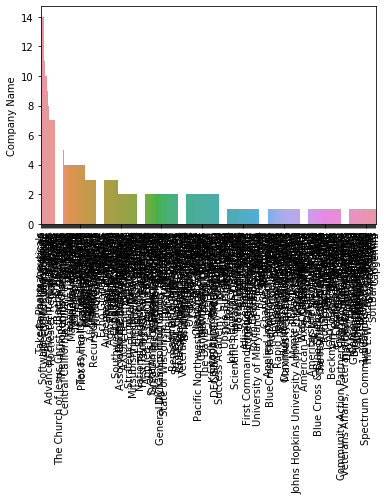

graph for Location : total = 37 


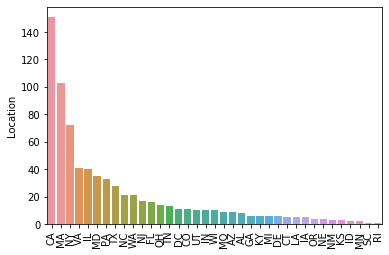

graph for Headquarters : total = 198 


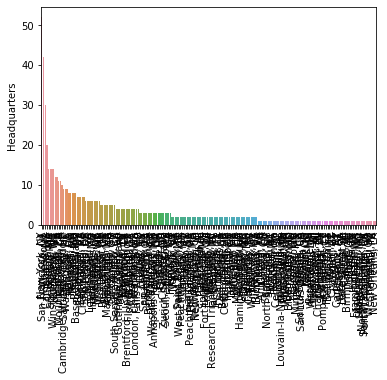

graph for Size : total = 9 


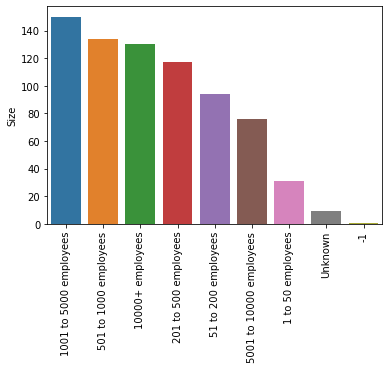

graph for Type of ownership : total = 11 


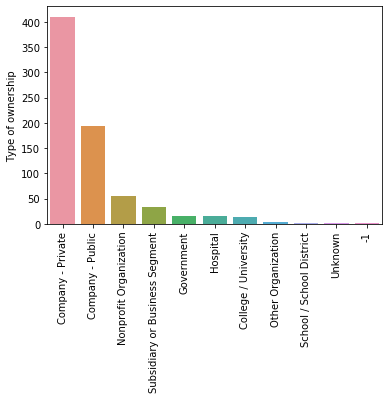

graph for Industry : total = 60 


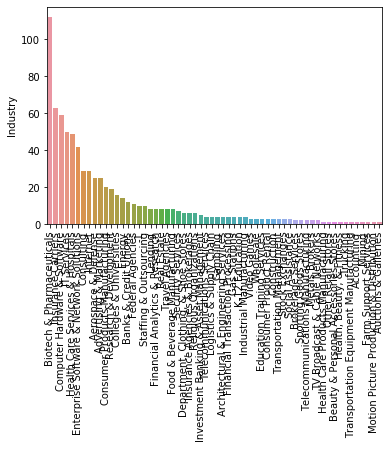

graph for Sector : total = 25 


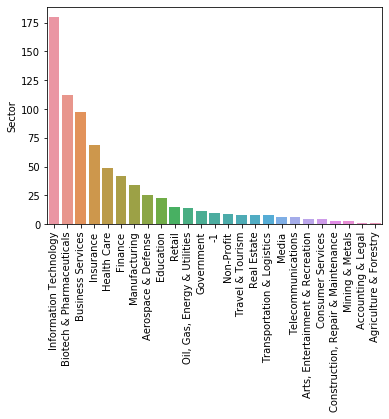

graph for Revenue : total = 14 


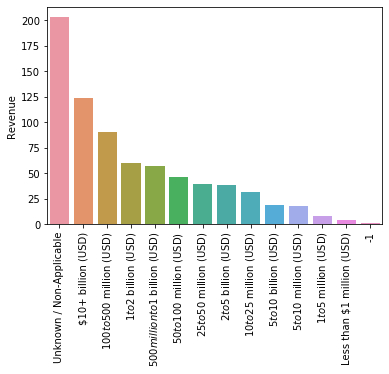

graph for same_state : total = 2 


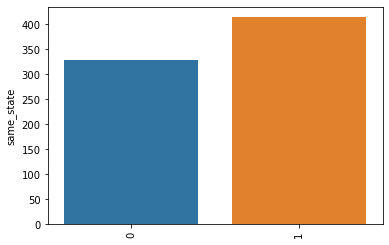

graph for python : total = 2 


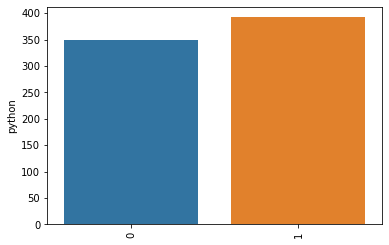

graph for r : total = 2 


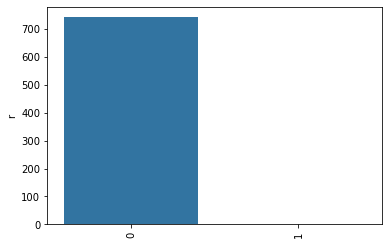

graph for spark : total = 2 


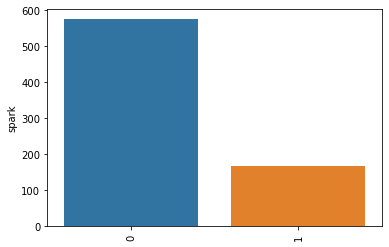

graph for aws : total = 2 


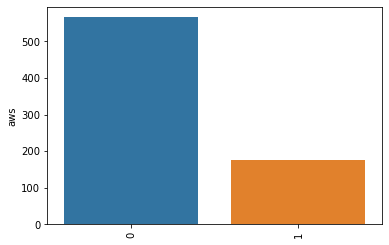

graph for excel : total = 2 


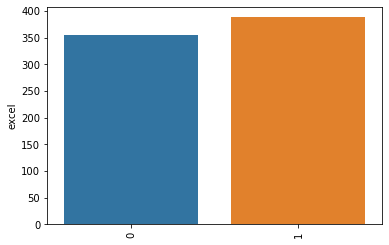

graph for seniority : total = 3 


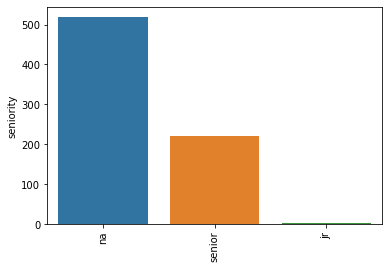

In [55]:
for c in df_cat.columns:
    cat_nv = df_cat[c].value_counts()
    print('graph for %s : total = %d ' %(c,len(cat_nv)))
    chart = sb.barplot(x=cat_nv.index,y=cat_nv)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location : total = 20 


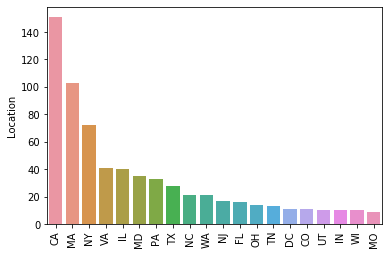

graph for Headquarters : total = 20 


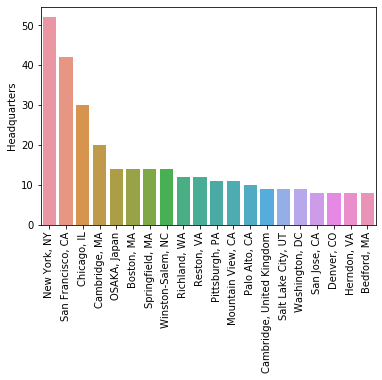

graph for Company Name : total = 20 


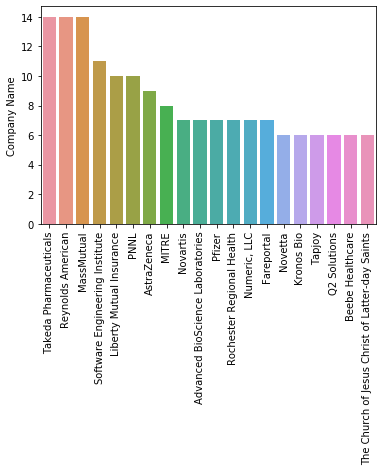

In [56]:
for c in df_cat[['Location','Headquarters','Company Name']].columns:
    cat_nv = df_cat[c].value_counts()[:20]
    print('graph for %s : total = %d ' %(c,len(cat_nv)))
    chart = sb.barplot(x=cat_nv.index,y=cat_nv)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [58]:
pd.pivot_table(df, index='Job Title', values='average_salary')

,average_salary
Job Title,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [59]:
pd.pivot_table(df, index=['Job Title','seniority'], values='average_salary')

average_salary
Job Title      seniority                
analyst        jr              53.250000
               na              61.308219
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [60]:
pd.pivot_table(df,index=['Location','Job Title'],values='average_salary').sort_values('Location',ascending=False)

average_salary
Location Job Title                     
WI       na                   54.000000
         data scientist      113.500000
         analyst              58.833333
WA       na                   97.500000
         data scientist       99.764706
         analyst              54.500000
VA       na                   79.300000
         mle                  87.000000
         data scientist      108.416667
         data engineer        96.900000
         analyst              71.583333
UT       data engineer       100.333333
         analyst              54.750000
         data scientist      140.500000
TX       na                   41.285714
         data scientist      100.730769
         data engineer       113.062500
TN       data scientist       96.000000
         data engineer       100.950000
         analyst              13.500000
SC       na                   60.500000
RI       analyst             100.000000
PA       manager             109.666667
         data engineer        91.500000
         data scientist      113.333333
         analyst              62.750000
         mle                 120.500000
         na                   76.062500
OR       data scientist       98.500000
         data engineer        73.000000
OH       na                   91.166667
         data scientist      105.285714
         analyst              53.875000
NY       na                   81.583333
         mle                 125.000000
         data scientist      115.250000
         data engineer        86.375000
         analyst              65.607143
NM       data scientist       74.333333
NJ       data scientist      106.875000
         analyst              83.583333
         data engineer       112.000000
         manager             109.500000
         director            161.500000
         na                   82.500000
NE       na                   41.000000
NC       na                   90.916667
         data scientist      117.000000
         data engineer       104.250000
MO       na                   72.333333
         manager              40.500000
         data scientist      127.666667
         analyst              61.000000
MN       data engineer        95.000000
         analyst              76.000000
MI       data scientist      106.625000
         manager              87.500000
MD       na                   88.750000
         data engineer       109.000000
         analyst              80.666667
         data scientist      109.115385
MA       na                  107.478261
         manager              71.900000
         director            117.833333
         data scientist      113.750000
         data engineer       107.291667
         analyst              59.125000
LA       analyst              48.000000
         data scientist      107.500000
         data engineer        70.500000
         na                   20.000000
KY       na                  103.500000
         data scientist       84.000000
KS       mle                  87.000000
IN       na                   69.000000
         data scientist       84.500000
         data engineer       114.500000
IL       analyst              66.500000
         na                   57.166667
         mle                 133.000000
         director            221.750000
         data scientist      117.233333
         data engineer        96.125000
ID       analyst              56.250000
IA       analyst              43.000000
         data engineer       102.833333
GA       data scientist       81.333333
         na                   80.000000
FL       data scientist       97.357143
         data engineer        91.833333
         analyst              47.500000
DE       na                   27.500000
DC       data scientist      149.000000
         data engineer        85.000000
         analyst              63.500000
CT       na                   62.500000
         data scientist       84.000000
CO       mle                 100.500000
         data engineer   

In [61]:
pd.pivot_table(df,index='Location',values='average_salary').sort_values('average_salary',ascending=False)

,average_salary
Location,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [63]:
pd.pivot_table(df[df['Job Title'] == 'data scientist'],index=['Location','Job Title'],values='average_salary').sort_values('average_salary',ascending=False)

,,average_salary
Location,Job Title,
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [57]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'same_state', 'age', 'python', 'r', 'spark', 'aws',
       'excel', 'seniority', 'desc_length', '#competitors'],
      dtype='object')

In [72]:
# 'Rating', 'Industry', 'Sector', 'Revenue','#competitors','hourly','employer_provided', 'python', 'r', 'spark', 'aws', 'excel', 'desc_length', 'Type of ownership'
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','#competitors','hourly','employer_provided', 'python', 'r', 'spark', 'aws', 'excel', 'desc_length', 'Type of ownership','average_salary']]
pcols = df_pivots.columns
pcols = pcols[:-1]
for c in pcols:
    print('-----------------------------------------------------------')
    print(c)
    print(pd.pivot_table(df_pivots,index=c,values='average_salary').sort_values('average_salary',ascending=False))

-----------------------------------------------------------
Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
-----------------------------------------------------------
Industry
                                          average_salary
Industry                                        

In [75]:
pd.pivot_table(df_pivots,index='Revenue',columns='python',values='average_salary',aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
